## Task 1 - Iris Flower Classification
Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

### Importing Necessary Libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading The  Dataset

In [20]:
# Reading csv file
df = pd.read_csv('Iris.csv')
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

### Dropping Unwanted Column

In [21]:
# Dropping Id columns because it's useless
df = df.drop(["Id"],axis=1)
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

### Analyzing The Dataset

In [22]:
# Counting the value of Species column
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [23]:
# Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
# Getting the shape of the dataset
df.shape

(150, 5)

In [25]:
# Checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [26]:
# Descriptive statistical analysis of data
df.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

### Visualizing The Dataset

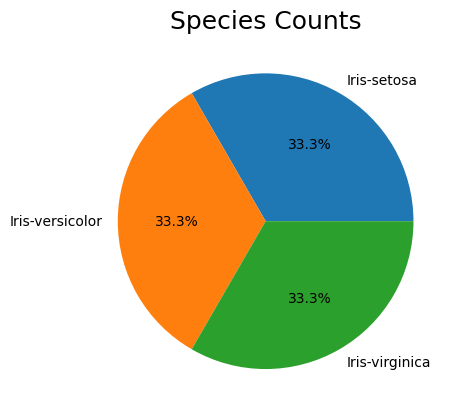

In [27]:
count =  df.Species.value_counts()
label = df.Species.unique().tolist()

# Pie Chart
plt.pie(count, labels=label,  autopct='%1.1f%%')
plt.title("Species Counts", fontsize=18)
plt.show()

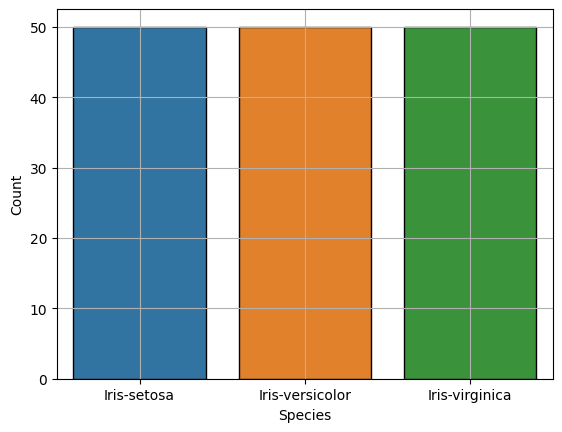

In [28]:
# Countplot
sns.countplot(data=df, x='Species', ec='black')
plt.xlabel("Species")
plt.ylabel("Count")
plt.grid(True)
plt.show()

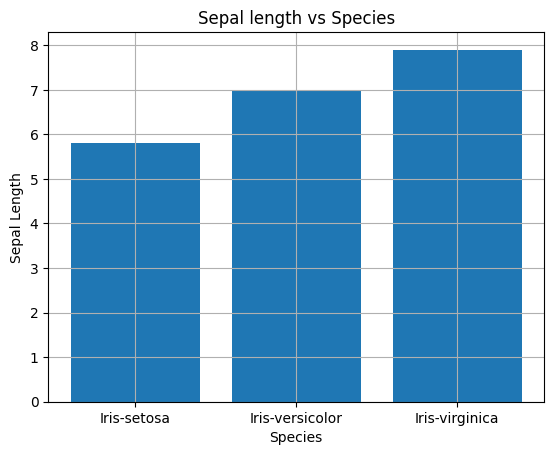

In [29]:
# Sepal length vs Species
plt.bar(df['Species'],df['SepalLengthCm'])
plt.title("Sepal length vs Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.grid(True)
plt.show()

In [30]:
# Sepal width vs Species
plt.bar(df['Species'],df['SepalWidthCm'])
plt.title("Sepal Width vs Species")
plt.xlabel("Species")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()

In [31]:
# Petal length vs Species
plt.bar(df['Species'],df['PetalLengthCm'])
plt.title("Petal Length vs Species")
plt.xlabel("Species")
plt.ylabel("Petal Length")
plt.grid(True)
plt.show()

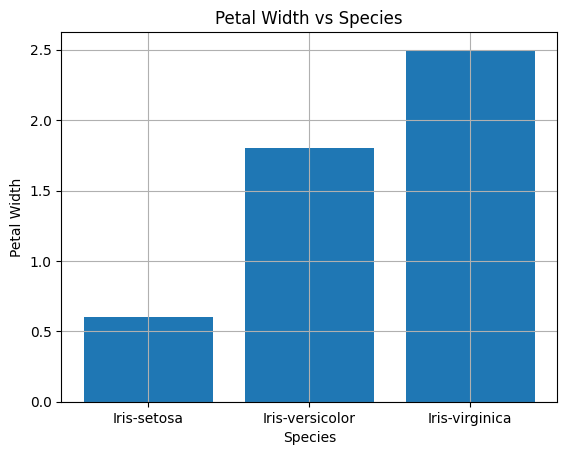

In [32]:
# Petal width vs Species
plt.bar(df['Species'],df['PetalWidthCm'])
plt.title("Petal Width vs Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")
plt.grid(True)
plt.show()

d:\Python 3.11\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


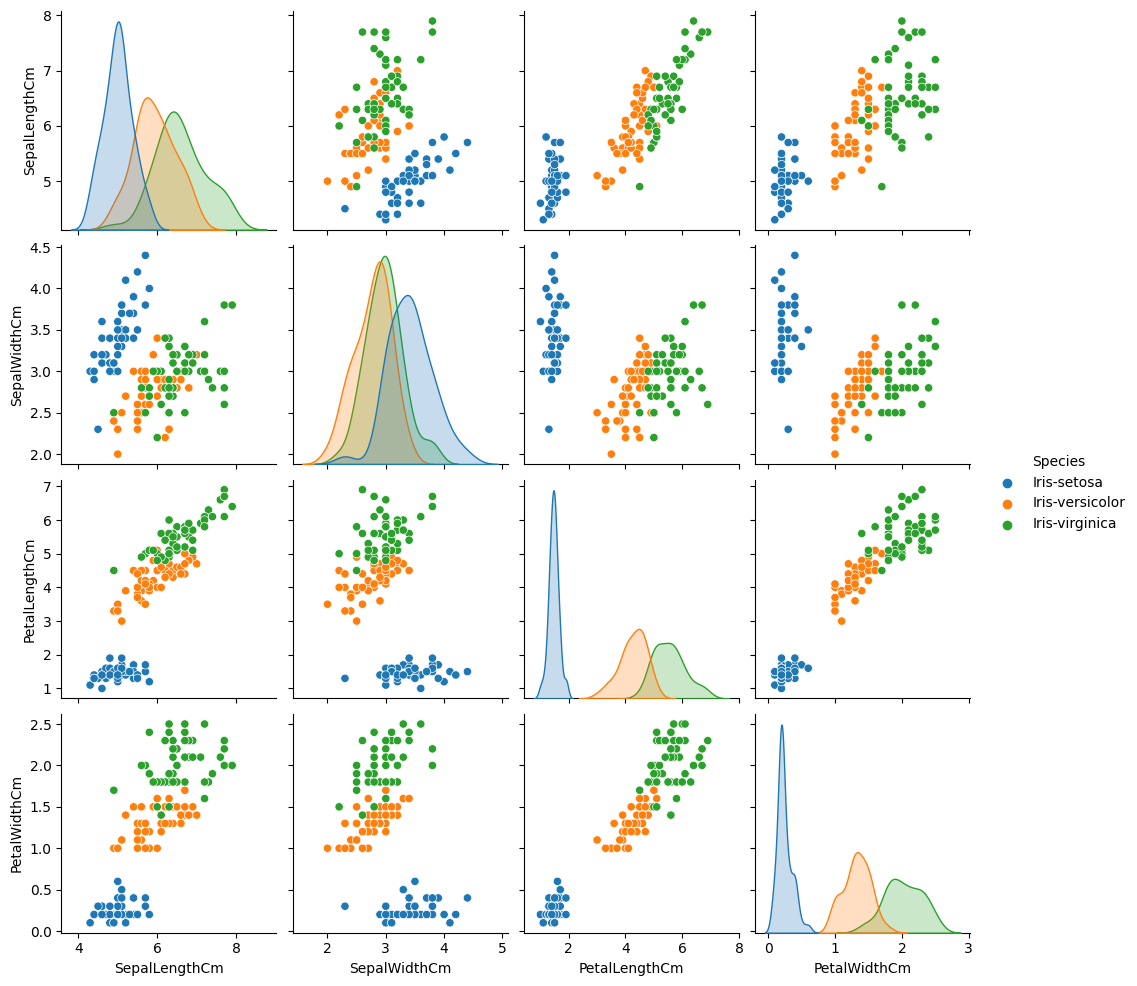

In [33]:
# Whole visualize of the dataset
sns.pairplot(df, hue='Species')
plt.show()

### Separating Features and Targets
x - Input variables such as independent features.  
y - dependent variable which is dependent on independent variables.

In [34]:
x = df.iloc[:,:4]
x

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [35]:
y = df.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Splitting The Data Into Train and Test Datasets

In [36]:
# Importing train_test_split for splitting the datasets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0)

In [37]:
# Viewing their shape
x_train.shape

(112, 4)

In [38]:
# Viewing their shape
x_test.shape

(38, 4)

In [39]:
# Viewing their shape
y_train.shape

(112,)

In [40]:
# Viewing their shape
y_test.shape

(38,)

### Creating The Model
Classifying using Logistic Regression

In [41]:
# Importing Logistic Regression for making model
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

### Prediction

In [42]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

### Classification Report

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



### Confusion Matrix

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix

confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

### Accuracy Score

In [45]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}%".format(accuracy))

Accuracy of the model is 97.37%


### Prediction of Species

In [47]:
x_new = np.array([[5.2,3.5,1.5,0.2],[1.9,2.2,3.8,1.1],[3.2,2.5,4.6,1.9]])
pred = model.predict(x_new)
print(f"{pred}")

# Preventing warning to be printed on output cell
import warnings
warnings.filterwarnings("ignore")

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Conclusion
- In this task, I took Iris Flower dataset and performed Logistic Regression Algorithm to make model.
- It finally categorized flowers into species.
- I got an accuracy of 97.37% and It demonstrates that the model I created is extremely accurate.
- And I predicted the Species using a fresh set of data and obtained an accurate result.
